# Numerov method to solve the Schrodinger equation

# 🔬 Solving the Schrödinger Equation with the Numerov Method

This section of the notebook implements the **Numerov method** to solve the 1D time-independent Schrödinger equation:


$
\frac{d^2 \psi}{dx^2} = \frac{2m}{\hbar^2}(V(x) - E)\psi(x)
$

in dimensionless units, where:

- $ \psi(x)$ is the wavefunction,
- $ V(x) $ is the potential (e.g. harmonic $ x^2 $, anharmonic $ x^2 + \gamma x^4 $),
- $ E $ is the trial energy (called `eps` in the code),
- $ x $ is rescaled to a dimensionless coordinate $ \xi $.

The Schrödinger equation becomes:

$
\psi''(\xi) + \left(2\epsilon - V(\xi)\right)\psi(\xi) = 0
$

Numerov’s method allows accurate integration of this second-order ODE.

---

## ⚛️ Potential Definition

```python
def V(xi):
    return xi**2                     # Harmonic oscillator
    # return xi**2 + gamma*xi**4     # Anharmonic oscillator (uncomment to activate)


In [1]:
import matplotlib.pyplot as plt
import numpy as np
import math as m

In [2]:
def V(xi):
    return xi**2                     ## harmonic oscillator
    #return xi**2+gamma*xi**4        ## anharmonic oscillator
    

def b(eps,xi):
    ##   calculation of b starting from E (eps), x, and h (global)    
    return (h**2)/12*(2*eps-V(xi))

def numerov(n1,n2,eps):
    ## fills the values of psi(xi) from i=n1 to i=n2 (both included)
    ## both forward and backward
    psi = np.array(xi)  ## copy xi into psi
    j=np.sign(n2-n1)   ##1 if n2>n1, -1 otherwise

    ## S1/S2 provide the first two values of psi
    psi[n1]=0
    psi[n1+j]=1e-06
    ## S1/S2 implement Numerov
    for i in range(n1+2*j,n2+j,j):
        psi[i]=(2*psi[i-j]*(1-5*b(eps,xi[i-j]))-psi[i-2*j]*(1+b(eps,xi[i-2*j])))/(1+b(eps,xi[i])) 
    return psi

In [3]:
def evalDerivative(eps):
    ## S3 for given energy eps, create sequences left and right
    global psir, psil                   ## declare them as global to be available outside
    psil = numerov(0,nmatch+1,eps)      ## left solution, nmatch is in the main part = 10000
    psir = numerov(n-1,nmatch-1,eps)    ## right solution
    ## normalize them to nmatch
    alpha=psil[nmatch]/psir[nmatch]    ## continuity matching 
    psir=alpha*psir                    

    ## calculate the difference (diff) between centered derivatives (left and right) at the match
    dpsil=(psil[nmatch+1]-psil[nmatch-1])/(2*h)     ## both psil and psir are indexed from the left
    dpsir=(psir[nmatch+1]-psil[nmatch-1])/(2*h)     
    diff = dpsir-dpsil
    return diff

def findE(emin,emax,tol):               ## search for energy in the interval (emin,emax)
    ## implementation of bisection already provided
    while (emax-emin>tol):
        emed = (emin+emax)/2
        if evalDerivative(emin)*evalDerivative(emed)<0:
            emax = emed
        else:
            emin = emed
    return (emin+emax)/2;


In [4]:
## Main code

n       = 14000
nmatch  = 10000
xi      = np.linspace(-7.,7,n)
h       = xi[1]-xi[0]
gamma   = 0.075

## search for physical states in a given interval
print ("Searching for physical states")
nsteps=100
grid = np.linspace(0.2,2.7, nsteps) ## create interval partition
e=np.array([])
j=0
i=0

for j in range(0,nsteps-1):
    if evalDerivative(grid[j])*evalDerivative(grid[j+1])<0:
        e = np.append(e,findE(grid[j],grid[j+1],0.0001))
        print('energy', e[i])
        i=i+1

print ("Search for physical states completed")

Searching for physical states
energy 0.5000217013888889
energy 1.4999625157828282
energy 2.5000019728535356
Search for physical states completed


In [6]:
## choose a state, construct the wave function
print("Constructing wave function ")
e1=float(input('Enter emin: '))
e2=float(input('Enter emax: '))

Constructing wave function 


In [7]:

e = findE(e1,e2,0.0001)
print("Energy ", e)

## S4
## copy psir into the 'empty' part of psil so that psil represents the entire psi(x)
psil[nmatch:n]=psir[nmatch:n]

## calculate the integral of psi using the trapezoidal method
w=14./n
S=0
for i in range(1,n-1):
    S+=(psil[i])**2

I=w/2*((psil[0])**2+(psil[n-1])**2)+w*S
print ("Integral ", I)

psi=psil/m.sqrt(I)

## check that the normalization is correct
S=0
for i in range(1,n-1):
    S+=(psi[i])**2

I=w/2*((psi[0])**2+(psi[n-1])**2)+w*S
print ("Normalized integral", I)


Energy  1.499981689453125
Integral  187498426561.9331
Normalized integral 1.0000000000000049


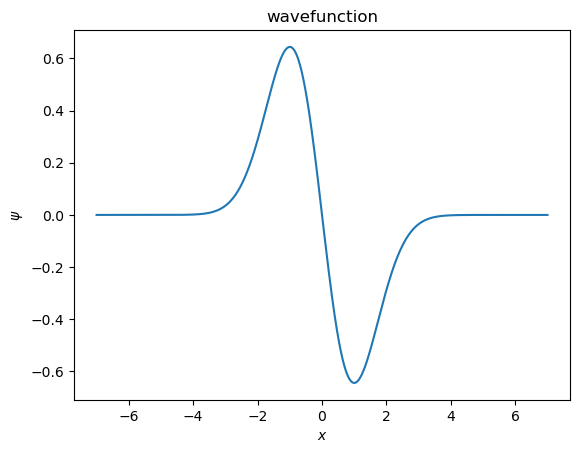

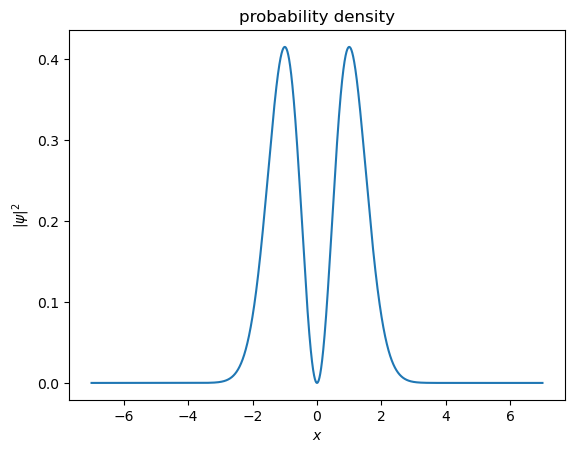

In [8]:
plt.plot(xi,psi)
plt.title('wavefunction')
plt.xlabel('$x$')
plt.ylabel('$\psi$')
plt.show()
plt.plot(xi,psi**2)
plt.title('probability density')
plt.xlabel('$x$')
plt.ylabel('$|\psi|^2$')
plt.show()